#Ejercicios

##Matplotlib Gráficas

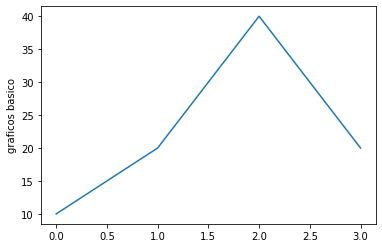

In [0]:
import matplotlib.pyplot as plt
plt.plot([10, 20, 40, 20])
plt.ylabel("grafico basico")
plt.show()

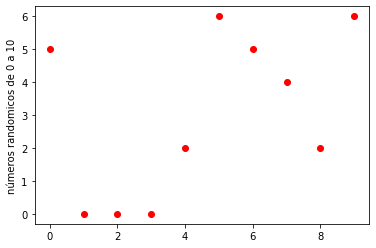

In [0]:
import matplotlib.pyplot as plt;import random;
lista= [ random.randrange(10) for i in range(10)]
plt.plot(lista,'ro')
plt.ylabel("números randomicos de 0 a 10")
plt.show()

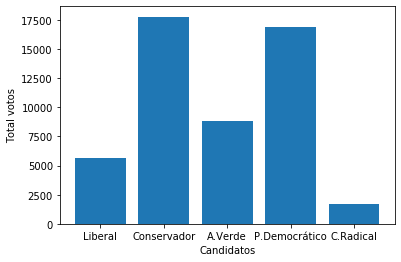

In [0]:
import numpy as np ; from random import randint; import matplotlib.pyplot as plt
matriz = np.array([[i+1, randint(1,20000)] for i in range(5)])
ganador= np.where(matriz == matriz[:,1].max())
#Diagrama de Barras
fig = plt.figure('Gráfica de barras') #Generacion de ventana
ax = fig.add_subplot(1,1,1) #Un eje coordenado
nombres = ['Liberal','Conservador','A.Verde','P.Democrático','C.Radical']#Arreglo con los partidos
ax.bar(range(len(matriz)),matriz[:,1])#Funcion var para diagramar, con parametros de votos y puntos a ubicar
ax.set_xticks(range(len(matriz[:,1]))) #Numero de puntos a ubicar
ax.set_xticklabels(nombres) #Agregar etiquetas a cada punto ubicado en el eje x
plt.ylabel("Total votos");plt.xlabel("Candidatos")
plt.show()

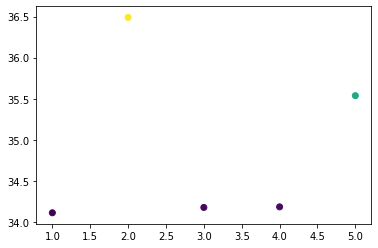

In [0]:
import numpy as np
matriz = np.random.uniform(8.2,10,size=(4,5))
tot_vueltas = np.array([[corredor+1,matriz[:,corredor].sum()] for corredor in range(len(matriz[0]))])
ganador = np.where(matriz == matriz[:,1].min())
#Diagrama de dispersion
x = tot_vueltas[:,1]
y = tot_vueltas[:,0]
fig = plt.figure()
fig.add_subplot(111)
plt.scatter(y, x, c=x)
plt.show()

##Opencv

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np
img = cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/imagen1.jpg")
if img.size == 0:
  print("Error: the image has not been correctly loaded.")
else:
  print('Image Dimension : ',img.shape)
  print ("height: ",str(img.shape[0]), ", width: ", img.shape[1], " Numbers of channels:", img.shape[2])
  processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/processed_image2.png', processed_image)
  #extract RED channel
  red_channel = img[:,:,2]
  #extract green channel
  green_channel = img[:,:,1]
  #extract blue channel
  blue_channel = img[:,:,0]
  #create images
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/processed_image_red.png', red_channel)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/processed_image_green.png', green_channel)
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/processed_image_blue.png', blue_channel)


Image Dimension :  (1000, 1000, 3)
height:  1000 , width:  1000  Numbers of channels: 3


##Resaltando color


In [0]:
import cv2;import numpy as np;
img = cv2.imread("/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/imagen2.jpg")
if img.size == 0:
  print("Error: the image has not been correctly loaded.")
else:
  print('Image Dimension : ',img.shape)
  print ("height: ",str(img.shape[0]), ", width: ", img.shape[1], " Numbers of channels:", img.shape[2])
  processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  #separate channels
  clearchannels = img
  #highlighting color
  for x in range(0,img.shape[0]):
    for y in range(0,img.shape[1]):
      b=int(clearchannels[:,:,0][x,y])
      g=int(clearchannels[:,:,1][x,y])
      r=int(clearchannels[:,:,2][x,y])
      d1=abs(b-r)
      d2=abs(r-g)
      d3=abs(b-g) 
      max_delta = 40
      if(
          #d1<max_delta or
          d2<max_delta 
         or d3<max_delta
         ):
        #clearchannels[:,:,0][x,y] = 0
        clearchannels[:,:,1][x,y] = 0
        #clearchannels[:,:,2][x,y] = 0

  clearchannels[:,:,0] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  #clearchannels[:,:,1] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  clearchannels[:,:,2] = [[0 for n in range(0,img.shape[1])] for j in range(0,img.shape[0])]
  #to rgb and blend
  processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)
  mixed = cv2.addWeighted(processed_image, 0.5, clearchannels, 0.5, 0) 
  #create images
  cv2.imwrite('/content/drive/My Drive/UPB_deep_learning_201902/Trabajos/JavierDuarte/imagenes/processed_image_mixed.png', mixed)

AttributeError: ignored